> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDB Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [17]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [18]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [19]:
df.shape

(10866, 21)

In [20]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [23]:
# After discussing the structure of the data and any problems that need to be
# cleaned, perform those cleaning steps in the second part of this section.

df['runtime'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)

df.dropna(axis=0, inplace=True)

In [24]:
#source: https://apassionatechie.wordpress.com/2018/02/24/how-do-i-split-a-string-into-several-columns-in-a-dataframe-with-pandas-python/

df_c = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
df_d = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
df_k = (df['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))
df_g = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_p = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))

#Checking df_c if split was conducted as intended
df_c.head()

,cast_1,cast_2,cast_3,cast_4,cast_5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [25]:
#Joining the seperated columns to the original dataframe and dropping unneeded columns for the analysis

df = df.join([df_c, df_d, df_k, df_g, df_p])
df = df.drop(['cast', 'keywords', 'director', 'genres', 'production_companies', 'imdb_id', 'homepage', 'overview', 'release_date', 'tagline'], axis=1)

In [28]:
#Checking number of duplicates
sum(df.duplicated())

0

In [29]:
#Checking if all rows contain the intended data type
df.dtypes

id                          int64
popularity                float64
budget                    float64
revenue                   float64
original_title             object
runtime                   float64
vote_count                  int64
vote_average              float64
release_year                int64
budget_adj                float64
revenue_adj               float64
cast_1                     object
cast_2                     object
cast_3                     object
cast_4                     object
cast_5                     object
director_1                 object
director_2                 object
director_3                 object
director_4                 object
director_5                 object
director_6                 object
keywords_1                 object
keywords_2                 object
keywords_3                 object
keywords_4                 object
keywords_5                 object
genres_1                   object
genres_2                   object
genres_3      

In [34]:
df['original_title'].value_counts().head()

The Thing               2
Clash of the Titans     2
Halloween               2
The Three Musketeers    2
Halloween II            2
Name: original_title, dtype: int64

In [35]:
#Checking column for dubplicated original_title entries
limit_4_title = df['original_title'].value_counts().index.tolist()
limit_4_title = limit_4_title[:4]
limit_4_title

limit_4_id = df['original_title'].value_counts().index.tolist()

def check_double_title(names):
    for limit in limit_4_title:
        df_title = df[df['original_title'] == limit]
        print(df_title.iloc[:,:5])
        print("---------------------------------------------------------------------")
        
check_double_title(limit_4_title)

         id  popularity      budget     revenue original_title
3472  60935    1.013771  35000000.0  28128670.0      The Thing
8890   1091    2.355353  10000000.0  13782838.0      The Thing
---------------------------------------------------------------------
         id  popularity       budget      revenue       original_title
1940  18823    2.087252  125000000.0  232713139.0  Clash of the Titans
8425  10323    0.203260   15000000.0   41092328.0  Clash of the Titans
---------------------------------------------------------------------
         id  popularity      budget     revenue original_title
7483   2082    0.809646  15000000.0  80253908.0      Halloween
10759   948    1.198849    300000.0  70000000.0      Halloween
---------------------------------------------------------------------
          id  popularity      budget      revenue        original_title
3425   52451    1.407986  75000000.0  132274484.0  The Three Musketeers
10251  10057    0.794564  30000000.0   53898845.0  The 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which genres are most popular from year to year?)

In [37]:
# Selecting genres columns for the analysis of the original data frame
df_genres = df.loc[:, 'genres_1': 'genres_5' ]
# Adding release year to df_genres
df_genres_dates = df_genres.join(df['release_year'])

In [38]:
years = df_genres_dates['release_year'].unique() #creates an array of years mentioned in release year 
most_common = [] #creates a list of tuples for most common genres in specific years

#for loop to create most_common list
for year in years:
    #creates df filtered by every year mentioned in years
    a = df_genres_dates[df_genres_dates['release_year'] == year] 
    #drops columns "release_year to perferm stack value count in next line
    b = a.drop(['release_year'], axis = 1)
    #performs value count trough genres_1 - genres_5 and stores the index of maximum count
    c = b.stack().value_counts().idxmax() 

    #creates a masked DataFrame for respective years
    x = df[df['release_year'] == year]
    #creates the mean of vote_average and stores the index of maximum value
    y = x.groupby(['genres_1'])['vote_average'].mean().idxmax()
    if c == y:
        z = 'Equal'
    else:
        z = 'Not equal'
        #appends year with value count trough genres_1 - genres_5, the highest average vote_average and indicates if the resulting columns match
    most_common.append((year, c, y, z))

#creates df for list of tuples named most_common
df_most_popular = pd.DataFrame(most_common, columns=['release_year', 'popular_produced_genre', 'popular_voted_gerne', 'is_equal']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_most_popular

,release_year,popular_produced_genre,popular_voted_gerne,is_equal
0,1961,Comedy,Comedy,Equal
1,1962,Adventure,Adventure,Equal
2,1963,Adventure,Action,Not equal
3,1964,Music,Adventure,Not equal
4,1965,Adventure,Adventure,Equal
5,1967,Adventure,Action,Not equal
6,1969,Adventure,Adventure,Equal
7,1971,Thriller,Action,Not equal
8,1972,Drama,Drama,Equal
9,1973,Thriller,Drama,Not equal


In [39]:
df_most_popular['is_equal'].value_counts()

Not equal    39
Equal        12
Name: is_equal, dtype: int64

### Research Question 2  (Did movies with higher vote count received a better rating)

In [41]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
#Slice DataFrame to get 2 columns 'vote_count' and 'vote_average'
df_vote = df.loc[:, 'vote_count' : 'vote_average']
#To compare results only entries are considered with more than 2000 votes
df_vote_2000 = df_vote[df_vote['vote_count'] > 2000]


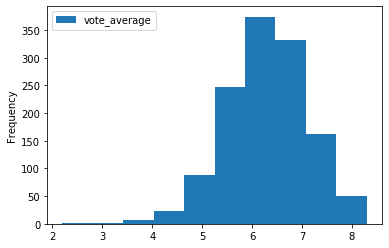

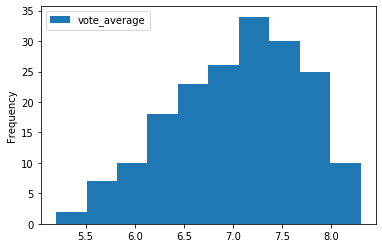

In [45]:
df_vote.plot(x='vote_count', y='vote_average', kind='hist');
df_vote_2000.plot(x='vote_count', y='vote_average', kind='hist');

In [46]:
df_vote.corr()

,vote_count,vote_average
vote_count,1.000000,0.464812
vote_average,0.464812,1.000000


In [47]:
df_vote_2000.corr()

,vote_count,vote_average
vote_count,1.000000,0.305343
vote_average,0.305343,1.000000


### Research Question 3  (What were the most popular produced genres in 2000 compared to 2015?)

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!